<b>California Housing Data</b>

In [23]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [7]:
# importing dataset 
from sklearn import datasets

cal_house= datasets.fetch_california_housing()
c_data= cal_house.data
# defining the columns names of the data
headers=cal_house.feature_names
data_c=pd.DataFrame(c_data,columns=headers)

<b>Explore Data</b>

In [8]:
data_c.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
data_c.shape

(20640, 8)

<b>Observation:</b>
There are 20640 rows and 8 columns in the dataset.

In [5]:
data_c.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

<b> Observation:</b>
There are 8 columns in the dataset.

In [130]:
data_c.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

<b>Observation:</b>
All 8 attributes are of float datatype.

<b>Checking Missing Values</b>

In [39]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [41]:
data_c.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<b>Observation:</b>
There is no missing value in the dataset.

<b>Summary Statistics</b>

In [42]:
data_c.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<b>Observations:</b>
<li> Population varies from 3 to 35682.</li>
<li> Latitude varies from 32 to 41.</li>
<li> Longitude varies from -124 to -114.</li>

# Exploratory Data Analysis

<b>Uni-Variate</b>

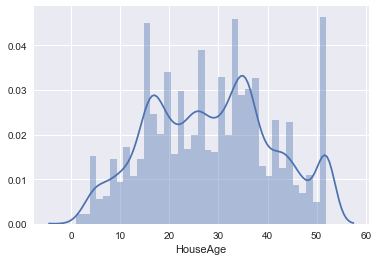

In [45]:
sns.distplot(data_c["HouseAge"])
plt.show()

<b>Observation:</b>
The average HouseAge is ~35.

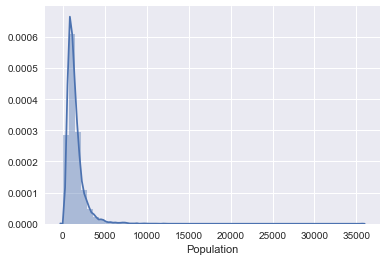

In [50]:
sns.distplot(data_c["Population"])
plt.show()

<b>Observation:</b>
The average population is ~2500.

In [54]:
data_c.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


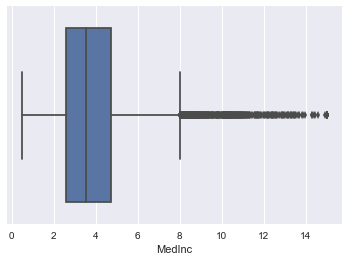

In [57]:
sns.boxplot(data_c.MedInc)
plt.show()

<b>Observation:</b>
There is an outlier in MedInc after 8.

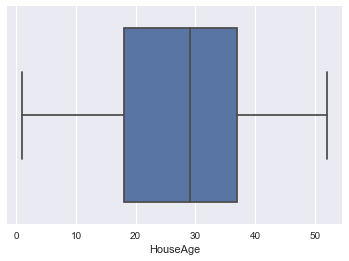

In [58]:
sns.boxplot(data_c.HouseAge)
plt.show()

<b>Observation:</b>
There is no outlier in the HouseAge.

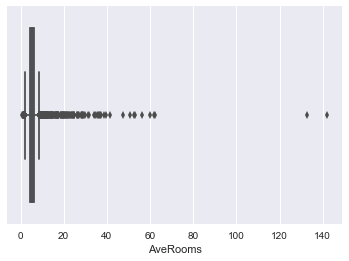

In [59]:
sns.boxplot(data_c.AveRooms)
plt.show()

<b>Observation:</b>
There is an outlier in AveRooms above 10.

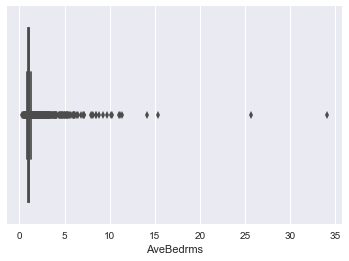

In [60]:
sns.boxplot(data_c.AveBedrms)
plt.show()

<b>Observation:</b>
There is an outlier in AveBedrms above 3.

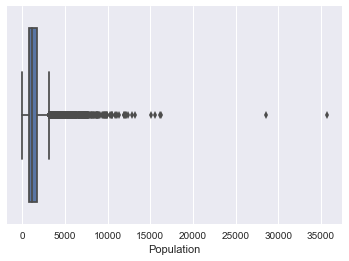

In [61]:
sns.boxplot(data_c.Population)
plt.show()

<b>Observation:</b>
There is an outlier in population above 2500.

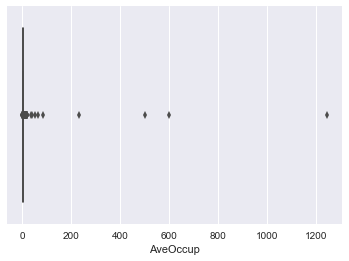

In [62]:
sns.boxplot(data_c.AveOccup)
plt.show()

<b>Observation:</b>
There is an outlier in AveOccup above 50.

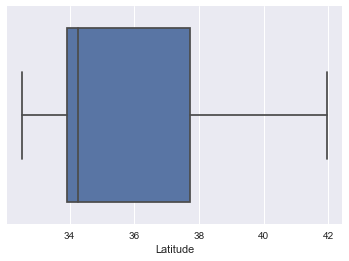

In [63]:
sns.boxplot(data_c.Latitude)
plt.show()

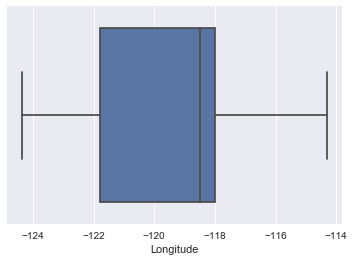

In [64]:
sns.boxplot(data_c.Longitude)
plt.show()

<b>Observation:</b>
There is no outlier in Longitude.

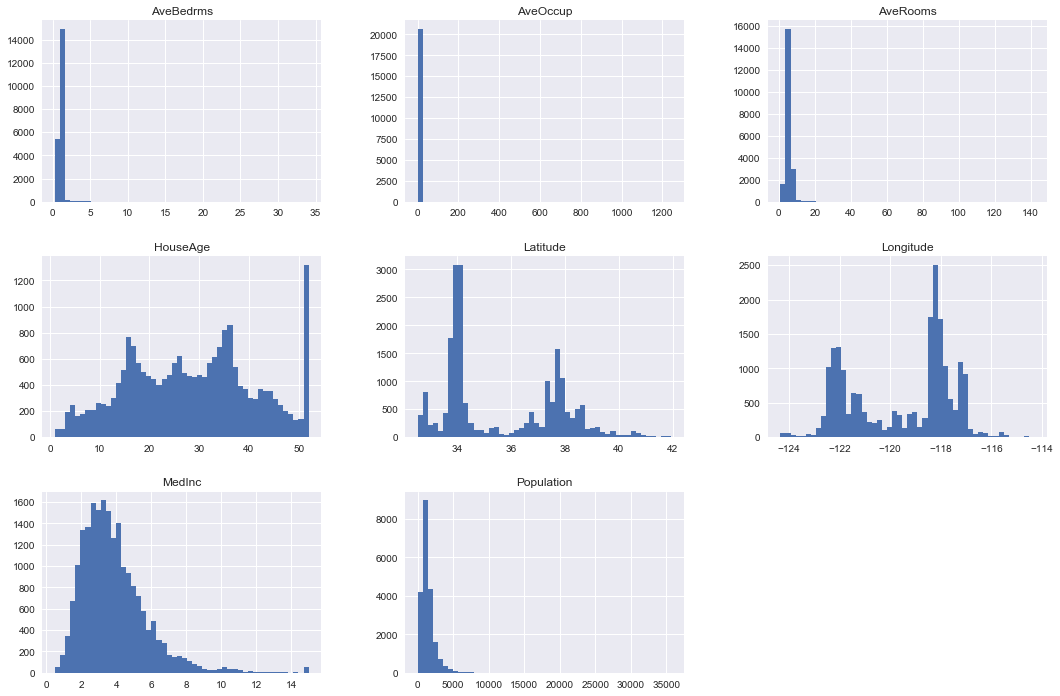

In [30]:
data_c.hist(bins=50, figsize=(18,12))
plt.show()

<b>Bi-Variate Analysis</b>

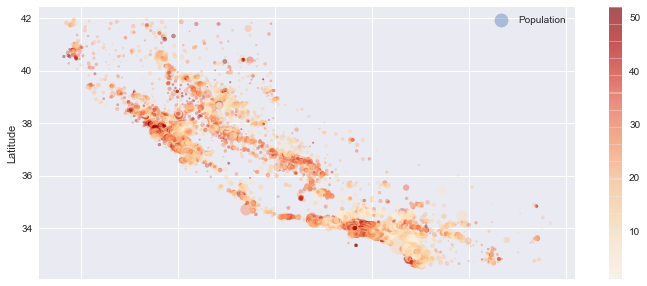

In [82]:
data_c.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, s=data_c['Population']/100, label='Population',c=data_c['HouseAge'],cmap=plt.get_cmap('OrRd'),colorbar=True,figsize=(12,5))
plt.legend()
plt.show()

<b>Observation:</b>
The house age depends much on population and location.

<b>Multi-Variate Analysis</b>

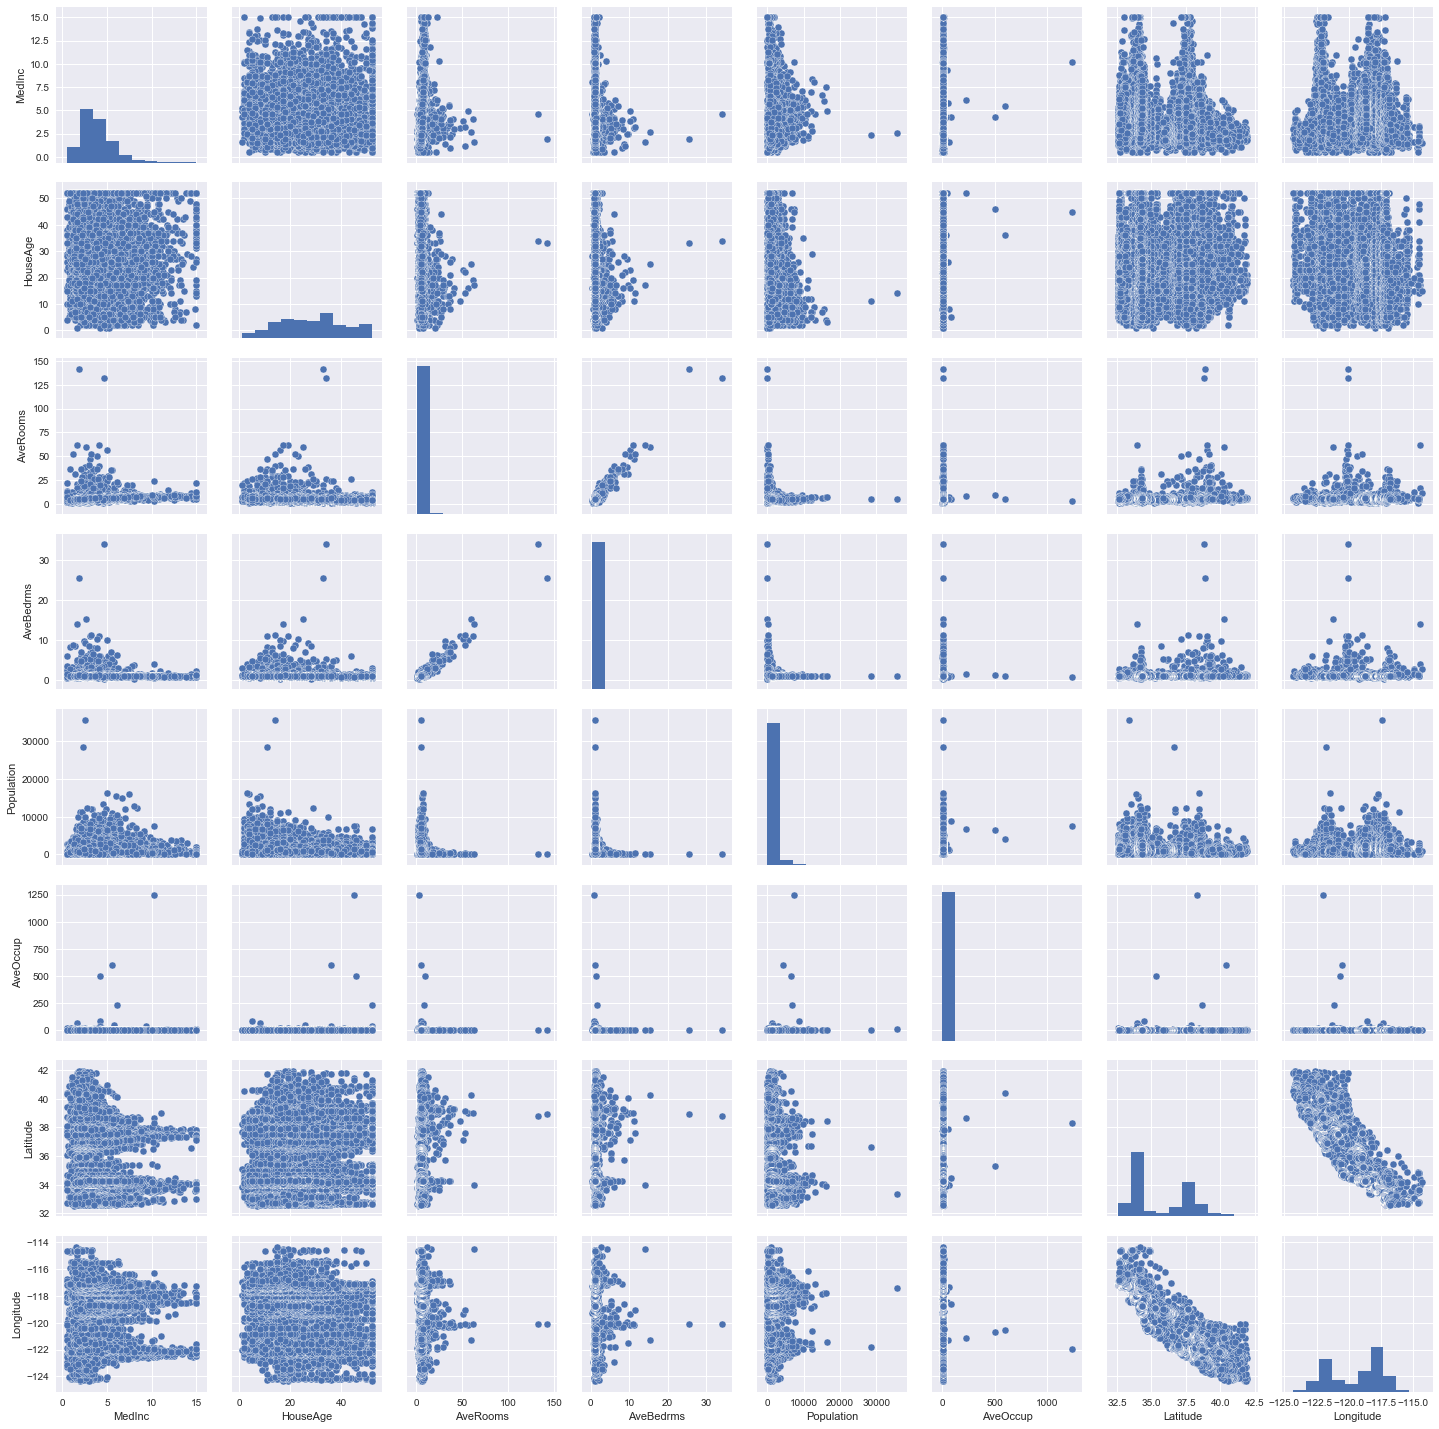

In [92]:
sns.pairplot(data_c)
plt.show()

<b>Observation:</b>
We see that AveRooms, AveBedrms,Population and AveOccup are left skewed.

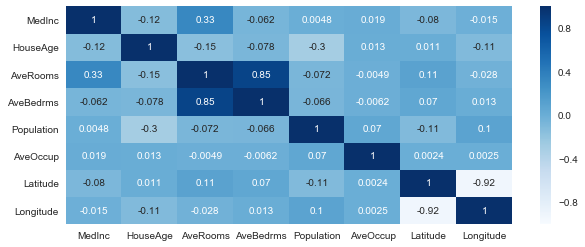

In [95]:
plt.figure(figsize=(10,4))
sns.heatmap(data_c.corr(), cmap="Blues",annot=True)
plt.show()

<b>Observation:</b>
There is strong correlation between AveBedrms and AveRooms.

<b>Checking Skewness</b>

In [9]:
data_c.skew(axis=0)

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64

In [10]:
# Treating the skewness in the dataset
for index in data_c.skew().index:
    if data_c.skew().loc[index]>0.5:
        data_c[index]=np.log1p(data_c[index])

In [11]:
data_c.skew(axis=0)

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
dtype: float64

<b>Dividing the input and output variables</b>

In [12]:
X= data_c
y= cal_house.target

<b>Splitting the data into train and test (70:30)

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

# Machine Learning Models:

As the target variable is continuous, we are implementing Random Forest Regressor, Decision Tree Regressor, Gradient Boosting,  Regressor, KNN Regressor and XG Boost Regressor with K-Fold Cross Validation.

<b>Random Forest Rgeressor</b>

In [39]:
r_f=RandomForestRegressor()
param_grid = { 'max_depth': [60,80], 'max_features': [3,5], 'min_samples_leaf': [5,7],'min_samples_split': [12,14],'n_estimators': [50,100]
}
rf_r= GridSearchCV(r_f, param_grid,cv=10)
rf_r.fit(X,y)
rf_r.best_params_

{'max_depth': 60,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 100}

In [40]:
rf_r=RandomForestRegressor(max_depth=60,max_features=5,min_samples_leaf=5,min_samples_split=14,n_estimators=100)
rf_r.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
           max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
pred_rf= rf_r.predict(X_test)

-0.4613300874379117


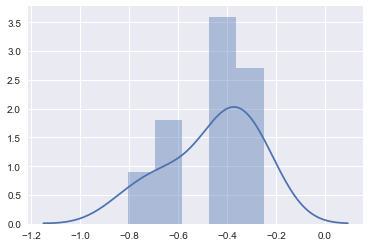

In [53]:
# mean score from the k fold
kfold_score_rf= cross_val_score(r_f, X,y,cv=10,scoring="neg_mean_squared_error")
print(kfold_score_rf.mean())
sns.distplot(kfold_score_rf, bins=5)
plt.show()

In [43]:
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rf_rmse

0.49681419948756694

<b>Decision Tree Regressor</b>

In [33]:
dt_r=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20],
              "max_depth": [2, 4],
              "min_samples_leaf": [20, 40],
              "max_leaf_nodes": [5, 20],
              }
dt_r=GridSearchCV(dt_r,param_grid,cv=10)
dt_r.fit(X,y)
dt_r.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 10}

In [35]:
dt_r=DecisionTreeRegressor(criterion="mse",max_depth=4,max_leaf_nodes=20,min_samples_leaf=40,min_samples_split=10)
dt_r.fit(X_train,y_train)
pred_dtr= dt_r.predict(X_test)

-0.6175187418051913


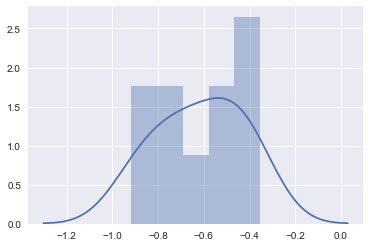

In [52]:
# mean score from the k fold
kfold_score_dt= cross_val_score(dt_r, X,y,cv=10,scoring="neg_mean_squared_error")
print(kfold_score_dt.mean())
sns.distplot(kfold_score_dt, bins=5)
plt.show()

In [37]:
dt_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_dtr))
dt_rmse

0.7212548983149851

<b>Gradient Boosting Regressor</b>

In [14]:
gb_r = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.02,0.05], 'subsample': [0.3, 0.5,0.7], 'n_estimators': [10,50,100], 'max_depth': [4,6,10]}
gb_r= GridSearchCV(estimator=gb_r, param_grid= parameters, cv=5, n_jobs=-1)
gb_r.fit(X,y)
gb_r.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}

In [20]:
gb_r = GradientBoostingRegressor(learning_rate=0.05,max_depth=6,n_estimators=100,subsample=0.5)
gb_r.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.5, verbose=0,
             warm_start=False)

In [21]:
pred_gbr= gb_r.predict(X_test)

-0.3773732853153916


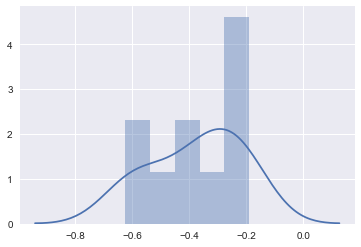

In [51]:
# mean score from the k fold
kfold_score_gbr= cross_val_score(gb_r, X,y,cv=10,scoring="neg_mean_squared_error")
print(kfold_score_gbr.mean())
sns.distplot(kfold_score_gbr, bins=5)
plt.show()

In [25]:
gb_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))
gb_rmse

0.4901618524836966

<b>KNN Regressor</b>

In [26]:
knn_r=KNeighborsRegressor()
parameters={"n_neighbors":range(2,60)}
knn_r= GridSearchCV(knn_r,parameters,cv=10)
knn_r.fit(X,y)
knn_r.best_params_

{'n_neighbors': 7}

In [27]:
knn_r= KNeighborsRegressor(n_neighbors=7)
knn_r.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [28]:
pred_knn= knn_r.predict(X_test)

-0.6899835400871723


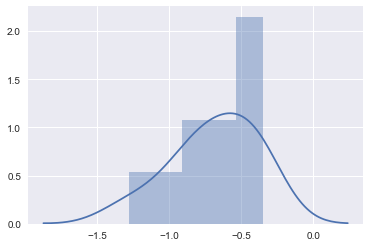

In [49]:
# mean score from the k fold
kfold_score_knn= cross_val_score(knn_r, X,y,cv=10,scoring="neg_mean_squared_error")
print(kfold_score_knn.mean())
sns.distplot(kfold_score_knn, bins=5)
plt.show()

In [50]:
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_knn))
knn_rmse

0.6947050768313482

# Evaluation:

In [57]:
#Lets initialise the data frame with columns model and f1_score
d= [["Random Forest Regressor",rf_rmse],["Decision Tree Regressor",dt_rmse],["Gradient Boosting Regressor", gb_rmse],["KNN Regressor", knn_rmse]]
comparsion= pd.DataFrame(d, columns=["Model Name","RMSE"], index=[1,2,3,4])
comparsion

,Model Name,RMSE
1,Random Forest Regressor,0.496814
2,Decision Tree Regressor,0.721255
3,Gradient Boosting Regressor,0.490162
4,KNN Regressor,0.694705


<b>Observations:</b>
<li> We have calculated k-fold cross validation score and RMSE value for the dataset using the different machine learning models.</li>
<li> From the above models, Gradient Boosting Regressor performed well with lowest RMSE value 0.490162.</li>

<b>Saving the Prediction</b>

In [58]:
np.savetxt('Model13.csv',pred_gbr,delimiter=',')

In [59]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gb_r, 'Project13.pkl')

['Project13.pkl']